## Number of Labels

Accuracy of a supervised model increases with the number of labels available for training. A natural question to ask is how many labels are needed for a given level of accuracy. In this notebook, we will experiment with the MNIST data set and estimate the number of labels needed to classify 10 digits as well as just two digits.

The results are interesting.

This is a Tensorflow 1.x notebook!

In [ ]:
%tensorflow_version 1.x

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random

Using TensorFlow backend.


These are some configuration parameters and hyperparameters.

In [2]:
# Input image dimensions
img_rows, img_cols = 28, 28

# The number of training samples per batch. 128 is a reasonable number.
batch_size = 128

# Our data set contains 10 digits, so the number of classes is 10
num_classes = 10

# epochs is the number of times the model is trained with the data set, more can be better, up to a point
epochs = 10

# dropout is a common regularization hyperperameter. It helps to avoid overfitting or memorizing the input.
dropout = 0.5

### Load data

Keras has a builting function for loading MNIST data and splitting it into train and test sets. x_train and x_test are arrays of train and test input images respectively. Images are represented as a 28 x 28 matrix of pixel values. y_train and y_test are train and test labels respectively.

Pixel values are normalized into values ranging from 0.0 - 1.0.

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Save original test images for display purposes
orig_test = x_test

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


### 10 Classes

All 10 classes are used for training and testing.

A simple CNN model is used for this experiment as it achieves good accuracy with modest computational requirements.

Several sizes of training data is used to measure accuracy.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Training samples: 100, test accuracy: 68.12 %
Training samples: 200, test accuracy: 74.53 %
Training samples: 500, test accuracy: 86.77 %
Training samples: 1000, test accuracy: 92.52 %
Training samples: 2000, test accuracy: 95.12 %
Training samples: 5000, test accuracy: 97.34 %
Training samples: 10000, test accuracy: 98.16 %


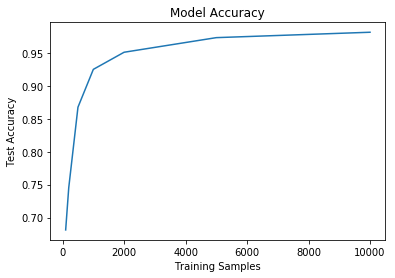

In [4]:
sizeList = [100, 200, 500, 1000, 2000, 5000, 10000]
accuracy = []
for trainingSize in sizeList:
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout/2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['acc'])

    x = x_train[:trainingSize]
    y = y_train[:trainingSize]
    history = model.fit(x, y, batch_size=batch_size, epochs=epochs, verbose=0)
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Training samples: %d, test accuracy: %.2f %%' % (trainingSize, score[1]*100))
    accuracy.append(score[1])

plt.plot(sizeList, accuracy)
plt.title('Model Accuracy')
plt.ylabel('Test Accuracy')
plt.xlabel('Training Samples')
plt.show()

### Binary Classification

Just two digits are used for training and test. This demonstrates that two classes require less training data than 10 classes.

Training samples: 100, test accuracy: 91.63 %
Training samples: 200, test accuracy: 96.47 %
Training samples: 500, test accuracy: 97.43 %
Training samples: 1000, test accuracy: 97.88 %
Training samples: 2000, test accuracy: 98.64 %
Training samples: 5000, test accuracy: 99.55 %
Training samples: 10000, test accuracy: 99.65 %


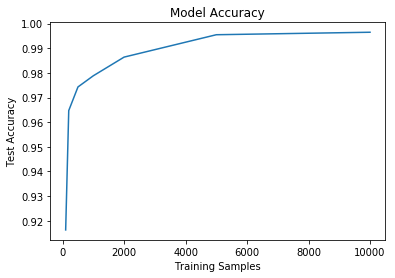

In [5]:
sizeList = [100, 200, 500, 1000, 2000, 5000, 10000]
accuracy = []

# Choose just two classes
classes = [8, 9]

# Training set
xtr = []
ytr = []
for i in range(len(y_train)):
    if y_train[i] in classes:
        xtr.append(x_train[i])
        ytr.append(classes.index(y_train[i]))

xtr = np.asarray(xtr)
ytr = np.asarray(ytr)

# Test set
xte = []
yte = []
for i in range(len(y_test)):
    if y_test[i] in classes:
        xte.append(x_test[i])
        yte.append(classes.index(y_test[i]))

xte = np.asarray(xte)
yte = np.asarray(yte)

for trainingSize in sizeList:
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout/2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['acc'])

    x = xtr[:trainingSize]
    y = ytr[:trainingSize]
    history = model.fit(x, y, batch_size=batch_size, epochs=epochs, verbose=0)
    score = model.evaluate(xte, yte, verbose=0)
    print('Training samples: %d, test accuracy: %.2f %%' % (trainingSize, score[1]*100))
    accuracy.append(score[1])

plt.plot(sizeList, accuracy)
plt.title('Model Accuracy')
plt.ylabel('Test Accuracy')
plt.xlabel('Training Samples')
plt.show()